LIbraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, accuracy_score

**Read Data**

In [ ]:
test_dir = ('/content/drive/MyDrive/Deep Learning/DL Exam/Datasets/CNN/Shoe Classification/test')

train_dir = ('/content/drive/MyDrive/Deep Learning/DL Exam/Datasets/CNN/Shoe Classification/train')

train_boots = ('/content/drive/MyDrive/Deep Learning/DL Exam/Datasets/CNN/Shoe Classification/train/Boots')
train_sandles = ('/content/drive/MyDrive/Deep Learning/DL Exam/Datasets/CNN/Shoe Classification/train/Sandals')
train_slipper = ('/content/drive/MyDrive/Deep Learning/DL Exam/Datasets/CNN/Shoe Classification/train/Slippers')

**Checking size of files**

In [ ]:
num_test = len(os.listdir(test_dir))
num_train_boots = len(os.listdir(train_boots))
num_train_sandles = len(os.listdir(train_sandles))
num_train_slipper = len(os.listdir(train_slipper))

In [ ]:
num_test,num_train_boots,num_train_sandles,num_train_slipper

(89, 326, 306, 146)

In [ ]:
!pip install split_folders -q
import splitfolders

In [ ]:
splitfolders.ratio(train_dir, output="./Validation",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) 

Copying files: 778 files [00:12, 64.37 files/s] 


**image augmentation**

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2, 
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        './Validation/train',
        target_size=(224,224),
        batch_size=32,
        class_mode="categorical",
)

Found 620 images belonging to 3 classes.


In [ ]:
val_datagen = ImageDataGenerator(
        rescale=1./255,)

val_generator = val_datagen.flow_from_directory(
        './Validation/val',
        target_size=(224,224),
        batch_size=32,
        class_mode="categorical",)

Found 158 images belonging to 3 classes.


**Printing No. of classes**

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Boots', 'Sandals', 'Slippers']

**Model Building**

In [ ]:
model = Sequential()

# Convolutional Layer

model.add(Conv2D(filters = 32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation = 'relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))

model.add(Dense(3, activation = 'softmax'))


**Model compiling**

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [ ]:
history = model.fit_generator(train_generator, epochs = 10,validation_data = val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
20/20 [==============================] - 115s 6s/step - loss: 1.1619 - accuracy: 0.4565 - val_loss: 0.8394 - val_accuracy: 0.7342
Epoch 2/10
20/20 [==============================] - 111s 6s/step - loss: 0.7907 - accuracy: 0.6629 - val_loss: 0.6604 - val_accuracy: 0.7089
Epoch 3/10
20/20 [==============================] - 111s 6s/step - loss: 0.6116 - accuracy: 0.7161 - val_loss: 0.5581 - val_accuracy: 0.7278
Epoch 4/10
20/20 [==============================] - 124s 6s/step - loss: 0.5314 - accuracy: 0.7710 - val_loss: 0.4715 - val_accuracy: 0.7405
Epoch 5/10
20/20 [==============================] - 114s 6s/step - loss: 0.4700 - accuracy: 0.7742 - val_loss: 0.3827 - val_accuracy: 0.7722
Epoch 6/10
20/20 [==============================] - 112s 6s/step - loss: 0.4624 - accuracy: 0.7919 - val_loss: 0.4024 - val_accuracy: 0.7722
Epoch 7/10
20/20 [==============================] - 111s 6s/step - loss: 0.4032 - accuracy: 0.8097 - val_loss: 0.3703 - val_accuracy: 0.8038
Epoch 8/10
20

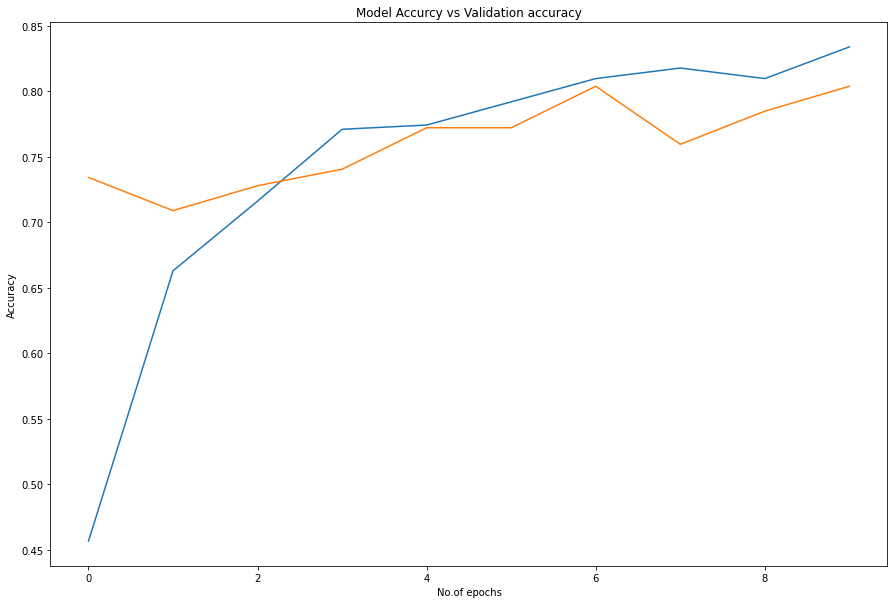

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accurcy vs Validation accuracy')
plt.xlabel('No.of epochs')
plt.ylabel('Accuracy')
plt.show()

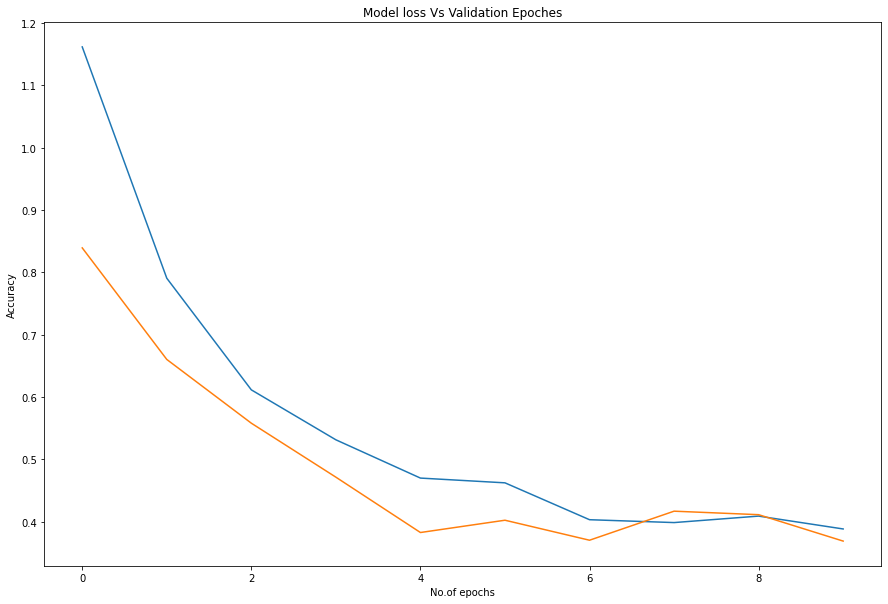

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss Vs Validation Epoches')
plt.xlabel('No.of epochs')
plt.ylabel('Accuracy')
plt.show()

**Predicting predict labels for unlebbeled testing data using model**

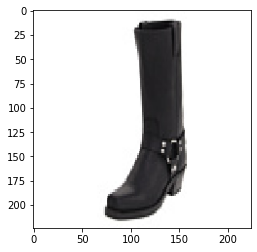

Boots


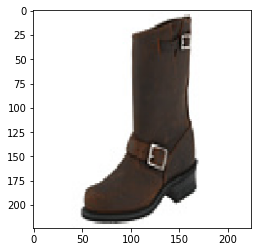

Boots


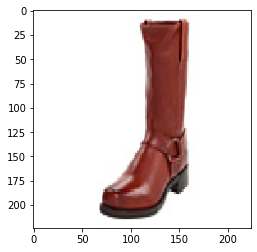

Boots


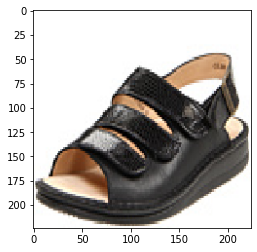

Sandals


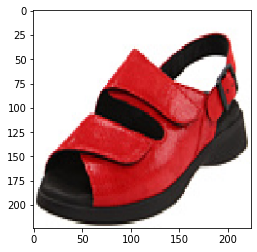

Boots


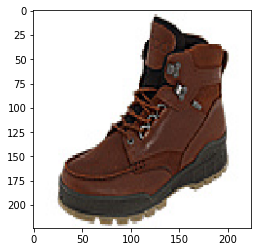

Boots


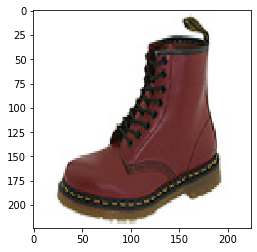

Boots


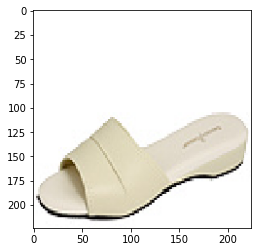

Sandals


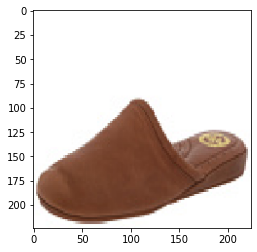

Sandals


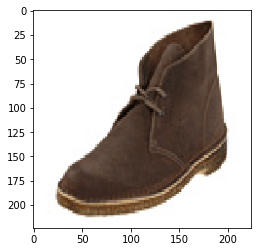

Boots


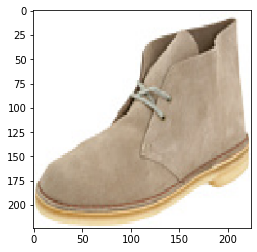

Boots


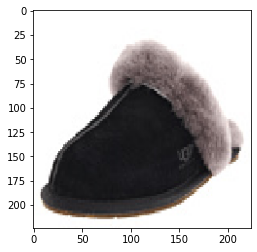

Sandals


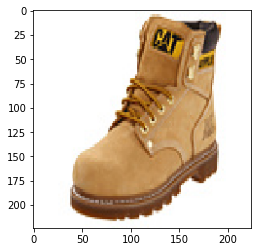

Boots


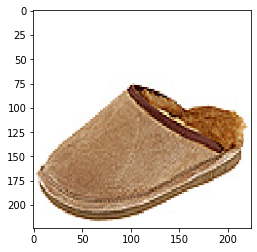

Sandals


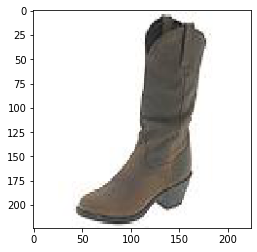

Boots


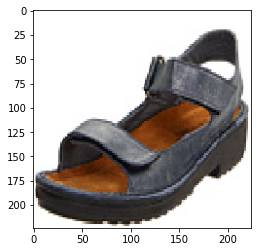

Sandals


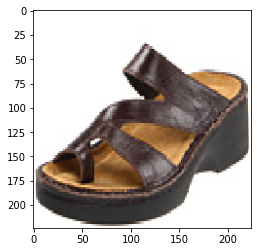

Sandals


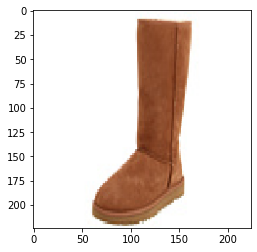

Boots


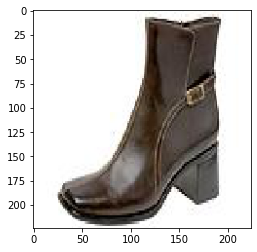

Boots


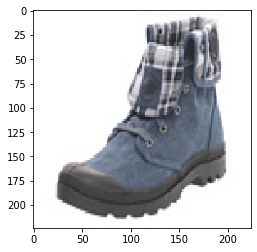

Boots


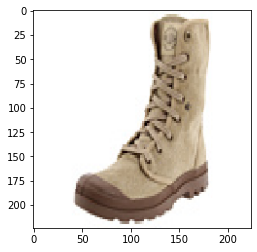

Boots


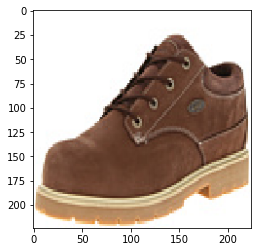

Boots


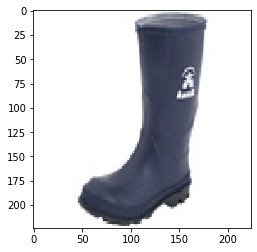

Boots


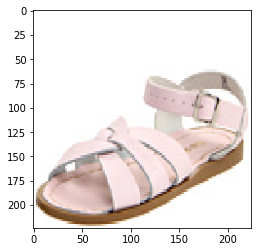

Sandals


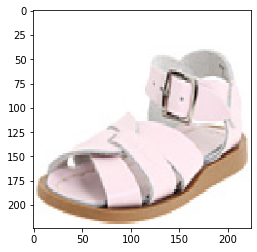

Sandals


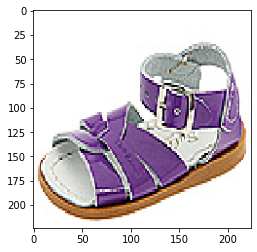

Sandals


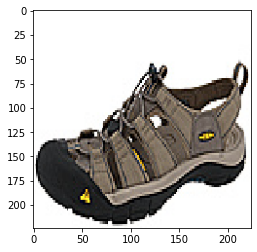

Sandals


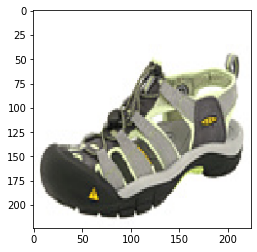

Sandals


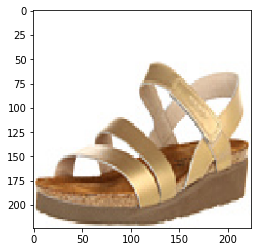

Sandals


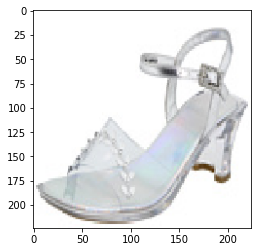

Sandals


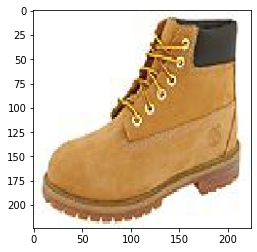

Boots


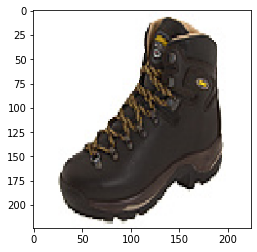

Boots


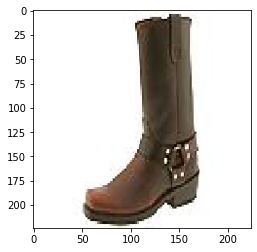

Boots


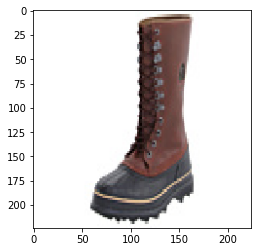

Boots


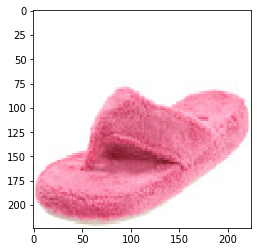

Sandals


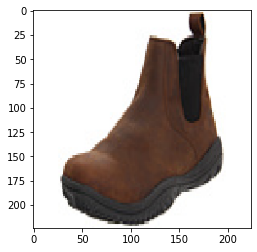

Boots


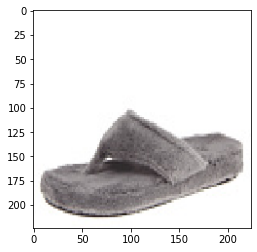

Sandals


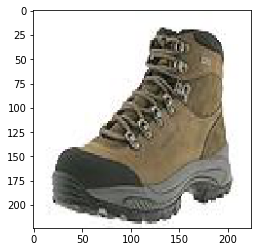

Boots


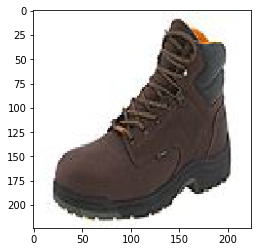

Boots


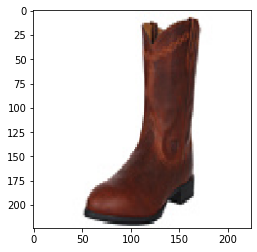

Boots


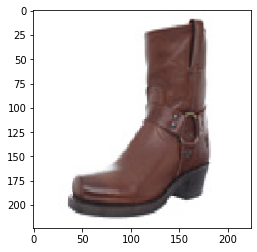

Boots


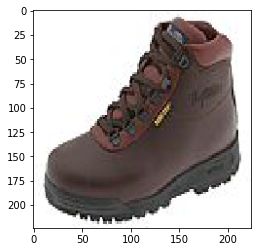

Boots


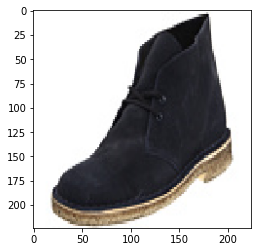

Boots


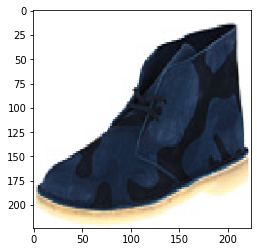

Boots


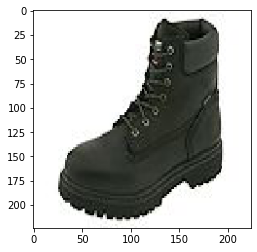

Boots


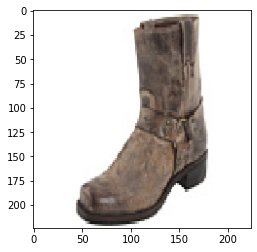

Boots


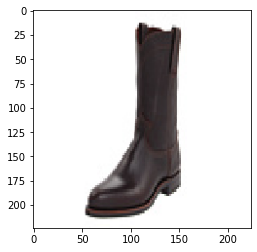

Boots


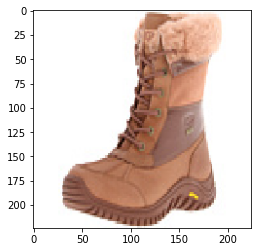

Boots


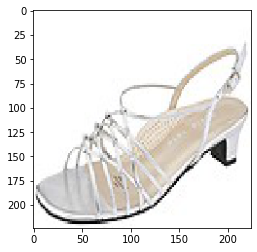

Sandals


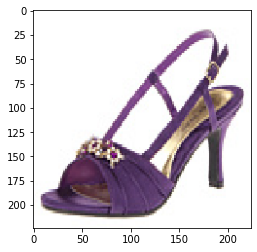

Sandals


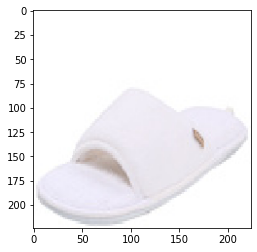

Sandals


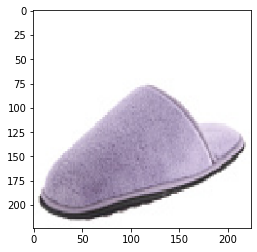

Sandals


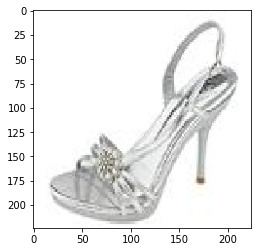

Sandals


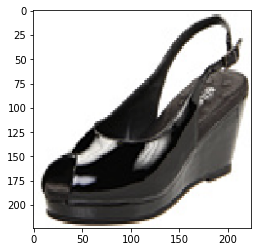

Sandals


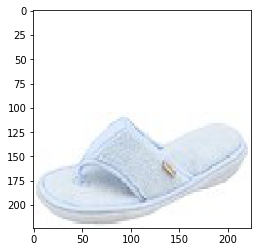

Sandals


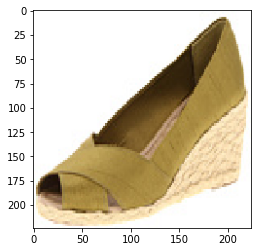

Sandals


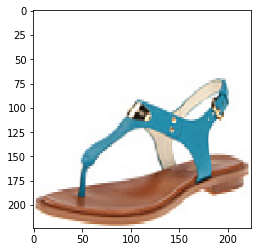

Sandals


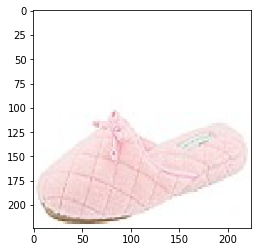

Sandals


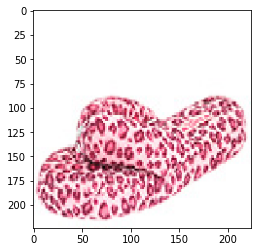

Sandals


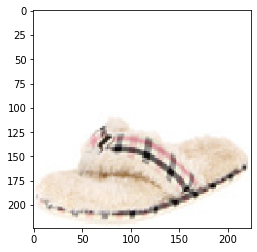

Sandals


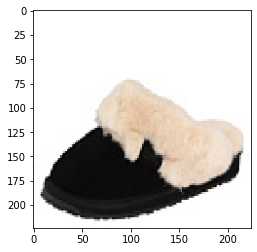

Sandals


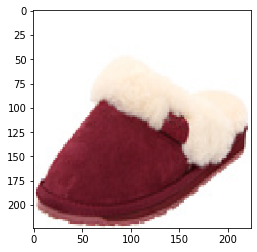

Sandals


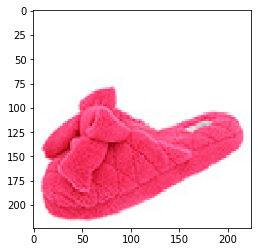

Sandals


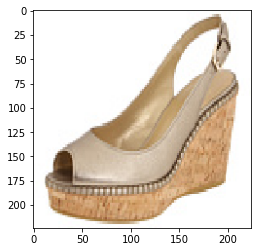

Sandals


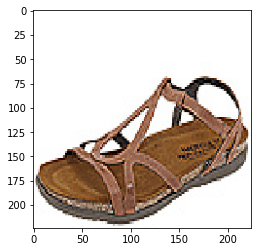

Sandals


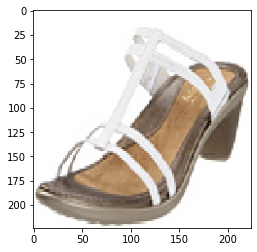

Sandals


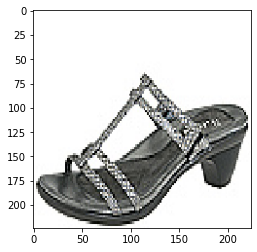

Sandals


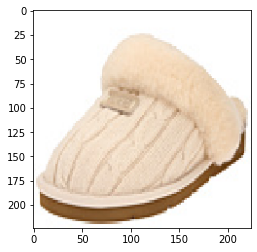

Sandals


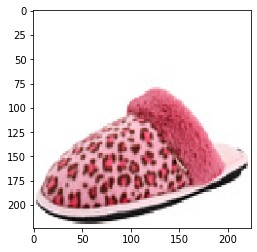

Sandals


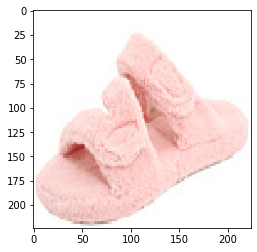

Sandals


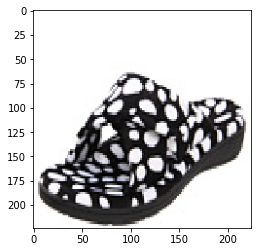

Sandals


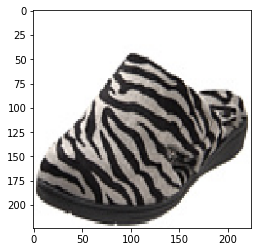

Sandals


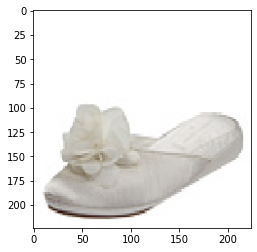

Sandals


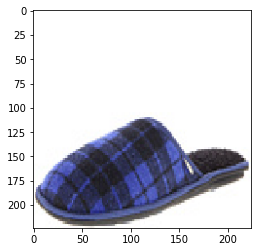

Sandals


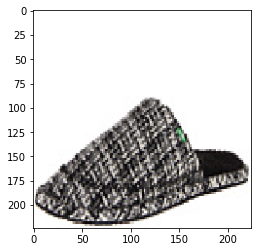

Sandals


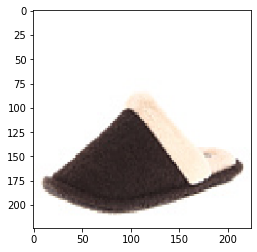

Sandals


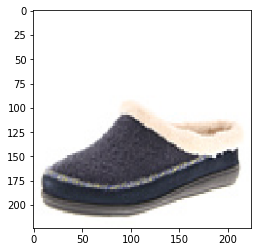

Sandals


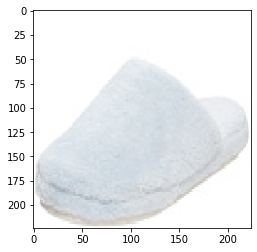

Sandals


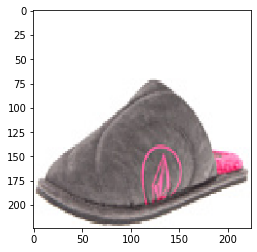

Sandals


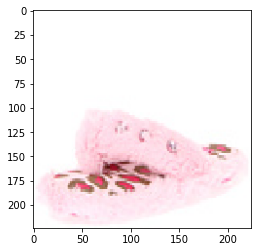

Sandals


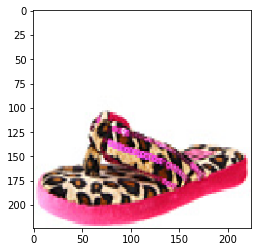

Sandals


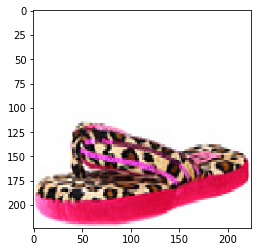

Sandals


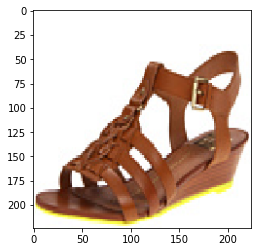

Sandals


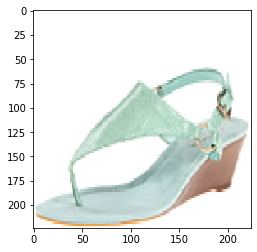

Sandals


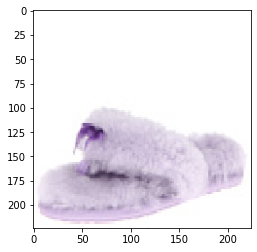

Sandals


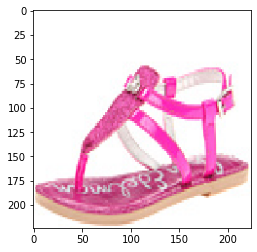

Sandals


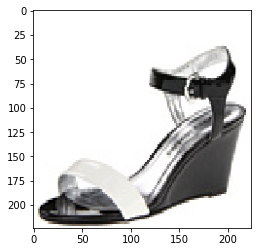

Sandals


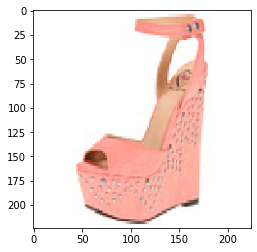

Sandals


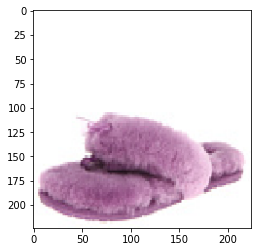

Sandals


In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from os import listdir

# loading all images into list
image_path=('/content/drive/MyDrive/Deep Learning/DL Exam/Datasets/CNN/Shoe Classification/test')
for filename in listdir(image_path):
        img_data = image.load_img(image_path + '/' + filename,target_size=(224,224))
        img_arr = image.img_to_array(img_data)
        plt.imshow(img_arr.astype('int'))
        plt.show()
        img_arr=np.expand_dims(img_arr,axis=0)
        pred=model.predict(img_arr)
        pred_class=np.argmax(pred,axis=1)
        if pred_class==0:
          print("Boots")
        elif pred_class==1:
          print("Sandals") 
        else:
          print("Slippers")